# Lab Assignment 3 -- Control Flow & Functions
In this lab, you will complete a series of exercises related to the lecture material on control flow and functions.

## Exercise 1a -- Divisible by n
Define a function called `divisible_by_n()` that takes two inputs:
- a range
- a single integer (the n)

By default, the single integer argument should be equal to 2 if only one argument is provided.

You function should return a list of all numbers in the input range that are divisible by `n`.

Include a function description for your function using docstrings.

**Hints**
- You can use `%` (for modular arithmetic) or you can use `math.round()` to check if a number is divisible by 3.
- Think about whether you should to use a `for` loop or a `while` loop.

In [ ]:
# Exercise 1a
def divisible_by_n(num_range, n):
    divis_list = []
    for num in num_range:
        if num % n == 0:
            divis_list.append(num)
    return divis_list #do stuff inside function

In [ ]:
divisible_by_n?

In [ ]:
#print(divisible_by_n(range(2),4))
print(divisible_by_n(range(100),3))

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]


## Exercise 1b -- Big Lists
`%timeit` in the code below is what is known as an IPython magic function. IPython stands for Interactive Python and simply **refers to a version of the Python (and other coding languages)** environment that has more functionality than the standard one. In particular, this functionality makes Python easier to interact with if we want to explore data, test functions, etc. Jupyter is built on IPython.

`%timeit` runs the code that follows it many times to get a sense of how long the code takes to run. Below, we use it to time how long `divide_by_n` takes on two ranges of different lengths.

Run the cell and answer the following questions in a Markdown cell:
1. Which range takes longer to get through? By how many times longer does it take? Does this make sense to you? What does it say about how the time of computation is affected by the length of the range?
2. Would your function work with a list instead of a range? Why or why not?

**Hint:** $\mu s$ means microseconds

In [ ]:
# Exercise 1b -- don't edit this cell
%timeit divisible_by_n(range(1_001), 3)
%timeit divisible_by_n(range(10_001), 3)

87 µs ± 629 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.18 ms ± 478 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Response to 1b


1.   range(10_001) takes longer to get through with 1180µs per loop. By around 13.56 times slower than range(1_001), it makes sense because 10 > 1. The time of computation increases 9 times per 10 times an increase in the range.
2.   The function should work with a predifined list with ONLY int and float values but NOT str, as seen below tested. That is because divisions are appliuble to numerical inputs.



In [ ]:
test = [1,2.3,3,4,5,6,7,8,9]
%timeit divisible_by_n(test, 3)

910 ns ± 15.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 2 -- Function Objects vs. Function Calls
`sum()` is a function that can take some iterables and return the sum of elements in that iterable. In the Markdown cell below, answer the following questions.
1. What types is `sum`?
2. What type is `sum([1,2,3])`? How about `sum([1,2.0,3])`?
3. Are the types of these three objects the same or different? Why?
4. What is the type of `print("hello")`? Why?


In [ ]:
# If needed, you can call the type function on these objects to help answer the question
type(sum([1,2.0,3]))

float

### Reponse to Exercise 2

1.   sum() is a type of function for numerical inputs.
2.   sum([1,2,3]) is an **INT**-type function with list [1,2,3] taken in as the input for summation. sum([1,2.0,3]) is likewise the same but its type (i.e. output) is a **float** instead of int.



# Exercise 3
Exercise 3 is a series of six questions
## Exercise 3a -- Factorial Function
The factorial of an integer n (denoted n! in mathematics) is equal to itself multipled by all of the integers smaller than n. That is
$$
n! = n * (n-1) * (n-2) *...* 2 * 1
$$
where $0!$ is defined to be 1.

The module `math` already has a factorial function, but you are going to build your own. In the cell below, define a function called `custom_factorial` that takes an integer as an input and returns the factorial of that integer. You must use a loop to calculate the factorial.

In [ ]:
# Exercise 3a Code
def custom_factorial(n):
    out = 1
    for num in range(1,n+1):
        out = out * num
    return out

In [ ]:
custom_factorial(29)

8841761993739701954543616000000

## Exercise 3b -- Checking Your Work
Using the `math` module's `factorial` function and a comparison operator, check that your function works for 10!.


In [ ]:
# Exercise 3b Code
import math
math.factorial(10) == custom_factorial(10)
print(math.factorial(10))
print(custom_factorial(10))

3628800
3628800


## Exercise 3c -- Nondecreasing Functions
A function $f$ is nondecreasing when $f(x) \geq f(y)$  if and only if $x \geq y$. Using `matplotlib.pyplot`, and your function plot the factorial function for $n = 0, 1, 2, 3, ..., 20$. You can plot a scatter plot or a line plot.

In the Markdown cell below, give another example of a nondecreasing function.

**Hint:** Use a a list comprehension.

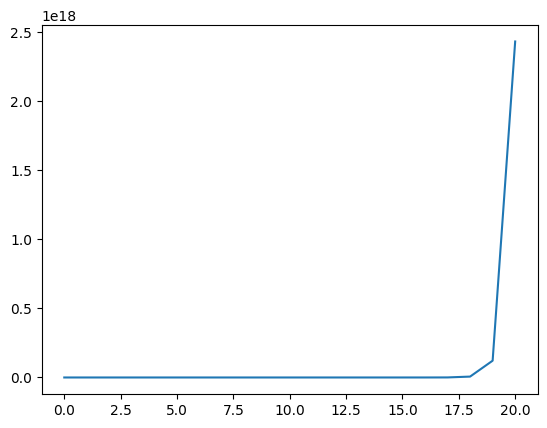

In [ ]:
# Exercise 3c Code
import matplotlib.pyplot as plt
x_coordinates = range(0,21)
fact_values = [custom_factorial(x) for x in x_coordinates]
plt.plot(x_coordinates, fact_values)

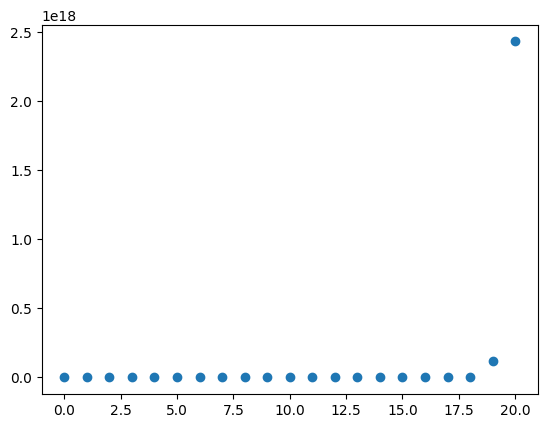

In [ ]:
plt.scatter(x_coordinates, fact_values)
plt.show()

### Response to Exercise 3c
Nondecreasing functions are any with their first derivative ≥ 0 (nonnegative). f(x) = 3x**2 is an example, as proven below that its first derivative is ≥ 0.

In [ ]:
from sympy import *
import numpy as np
x = Symbol('x')

y = 3*x**2
yprime = y.diff(x)
yprime

6*x

## Exercise 3d -- Finding the Smallest Integer
For a generic nondecreasing function $f$, we might be interested in finding the smallest integer $n$ such that $f(n)$ is greater than or equal to some constant $c$. In the lecture we did this with $f(n) = n^2$, which is nondecreasing for $n \geq 0$, and $c = 12345$.

Now, define a function calld `find_smallest_int` that takes a starting value `start`, a function `f`, and a constant `c` as inputs. Recognizing that these correspond to the values above, have your function return two values: the smallest integer $n$ such that $f(n) \geq c$ and the value of $f(n)$ for that integer.

**Hint:** If you're stuck, try looking at the lecture.

In [ ]:
# Exercise 3d Code
def find_smallest_int(start, f, c):
    while f(start) < c:
        start += 1

    return start, f(start)

In [ ]:
find_smallest_int(29, lambda x: x** 2, 30)

(29, 841)

## Exercise 3e -- Plugging in Your Function
Now, use `find_smallest_int` and `custom_factorial` to find the smallest $n$ such that $n! \geq 12,345$. Use a starting value of 0. Check your answer as we did in the lecture.


In [ ]:
# Exercise 3e Code
find_smallest_int(0, custom_factorial, 12345)

(8, 40320)

In [ ]:
custom_factorial(8)==math.factorial(8) >= 12345

True

## Exercise 3f -- Increasing n
Now we wil time the speed and output of `find_smallest_int` with smaller and larger values of $c$ and two different functions: `custom_factorial` and and a lambda function that sqaures a single input.

Answer the folowing questions in the Markdown cell below:
1. Which function takes longer to run for a fixed value of $c$. Why do you think this is?
2. What is the ratio between runtimes when fixing the function and varying $c$ from 1,000 to 10,000. How about 10,000 to 100,000? Compare this ratio to the ratio of smallest integers for those runs. Are they similar? Why or why not?  You will want to write some code to compare these values.


In [ ]:
# Exercise 1b -- don't edit this cell
%timeit find_smallest_int(0, custom_factorial, 1_000)
%timeit find_smallest_int(0, custom_factorial, 10_000)
%timeit find_smallest_int(0, custom_factorial, 100_000)


%timeit find_smallest_int(0, lambda x: x ** 2, 1_000)
%timeit find_smallest_int(0, lambda x: x ** 2, 10_000)
%timeit find_smallest_int(0, lambda x: x ** 2, 100_000)

6.28 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.02 µs ± 148 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.73 µs ± 85.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
48.2 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
119 µs ± 760 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
# Compare ratios here
from fractions import Fraction as F
print(F.from_float(16.5/21.8))
print(F.from_float(29.5/86.6))

print(F.from_float(21.8/15.8))
print(F.from_float(86.6/561))

3408687791358403/4503599627370496
3068272263451031/9007199254740992
6213827333966887/4503599627370496
2780832283281889/18014398509481984


In [ ]:
print(find_smallest_int(0, custom_factorial, 1_000))
print(find_smallest_int(0, custom_factorial, 10_000))
print(find_smallest_int(0, custom_factorial, 100_000))

print(find_smallest_int(0, lambda x: x ** 2, 1_000))
print(find_smallest_int(0, lambda x: x ** 2, 10_000))
print(find_smallest_int(0, lambda x: x ** 2, 100_000))

(7, 5040)
(8, 40320)
(9, 362880)
(32, 1024)
(100, 10000)
(317, 100489)


In [ ]:
print(F.from_float(7/8))
print(F.from_float(32/100))

print(F.from_float(8/9))
print(F.from_float(100/317))

7/8
5764607523034235/18014398509481984
2001599834386887/2251799813685248
5682775555041635/18014398509481984


### Response to Exercise 3f


1.   For a fixed value of c 1_000, 10_000, and 100_000, lambda takes longer because it is computing x**2 for each x up to c separately, WHEREBY custom_factorial multiplies to each preceding and subsequent number in one expression/one go (i.e., x*x1*x2*,...).
2.   The ratio between runtimes when fixing the function and varying  𝑐  from 1,000 to 10,000 is 3408687791358403/4503599627370496 for custom_factorial
and 3068272263451031/9007199254740992 for lambda.
For 10,000 to 100,000, it is 6213827333966887/4503599627370496 for custom_factorial
and 2780832283281889/18014398509481984 for lamdbda.
The ratio of smallest integers for those runs are 7/8 and 5764607523034235/18014398509481984 for custom_factorial
and 2001599834386887/2251799813685248, 5682775555041635/18014398509481984 for lambda.
**Both** functions' 10_000/100_000 smallest int ratio contain 18014398509481984 at the bottom, alongside lambda's runtime for 100_000. This may be because it is over the same c value 10,000/100,000.
Also, both functions' 1,000/10,000 runtime ratios contain 4503599627370496 in the **denominator**, which may be because each timeit has the same 1,000/10,000 piece of information per run.



## Exercise 4 -- Fibonacci Sequence
The Fibonacci Sequence is an infinite sequence of integers $X_0, X_1, X_2, X_3, ...$ defined as below

$$
X_0 = 0
$$
$$
X_1 = 1
$$
$$
\hspace{3.66cm}X_t = X_{t-1} + X_{t-2} \text{ for } t \geq 2
$$

Below define a function called `fibo_seq` that takes $t$ as an input and returns $X_t$, the $t$-th element of the Fibonacci Sequence.


In [ ]:
## Exercise 4 Code
def fibo_seq(t):
    x = 0
    if t == 0:
        return 0
    if t == 1:
        return 1
    xtm2 = 0
    xtm1 = 1
    for t in range(2, t+1):
        x = xtm1 + xtm2
        xtm2 = xtm1
        xtm1 = x

    return x



In [ ]:
fibo_seq(29)
fibo_seq?

## Exercise 5 -- Palindrome Detector
A palindrome is a word or phrase that is spelled the same backwards as it is forwards (ignoring spaces). Create a function called `is_palindrome` that takes a list of strings and returns a list of Boolean variables that indicate whether the respective string is a palindrome or not. **Ignore capitalization and spaces**.

When you're ready, test your function out on the cell below where `palindromes` and `nonpalindromes` are defined. Your function should return `[True, True, True, True, True]` for the former and `[False, False, False]` for the latter.


**Hints**
- A method will help you get rid of the white space
- Look up on Google how to reverse a string as the reverse method only exists for lists

In [ ]:
# Exercise 5 -- create is_palindrome function here
def is_palindrome(str_list):
  is_palindrome = []
  for str in str_list:
    normalized = str.replace(' ','').lower()
    is_palindrome.append(normalized == normalized[::-1])
  return is_palindrome

In [ ]:
# Run this cell when you're ready -- do not edit it
palindromes = ["Radar", "Taco cat", "Stresse dDesserts", "no Lemon no melon", "!??!!??!"]
nonpalindromes = ["Hello World", "VSP", "Vancouver Canada"]

print(is_palindrome(palindromes))
print(is_palindrome(nonpalindromes))

[True, True, True, True, True]
[False, False, False]


## Exercise 6 -- Comparison Operators & List Comprehensions
Using `num_list` and list comprehensions, create three lists that correspond to the elements in num_list:
1. `equal_list` whose elements should be true if the corresponding element in `num_list` is equal to 0 and false otherwise.
2. `greater_list` whose elements should be true if the corresponding element in `num_list` is strictly greater than 0 and false otherwise.
3. `lesser_list` whose elements should be true if the corresponding element in `num_list` is strictly less than 0 and false otherwise.
4. Finally, using the three lists you generated, list comprehensions, and `zip()`, create `true_list` a list of length 7 where every element is true.

**Hints for 4:**
- `zip` can be used on more than two lists
- use `or` within the list comprehension

In [ ]:
# Exercise 6 Code
# Don't edit the line below
num_list = [-5, -3, -1, 0, 1, 3, 5]

# your code below here
equal_list = [num == 0 for num in num_list]
greater_list = [num > 0 for num in num_list]
lesser_list = [num < 0 for num in num_list]

true_list = [a or b or c for a,b,c in list(zip(equal_list,greater_list,lesser_list))]

print(equal_list)
print(greater_list)
print(lesser_list)

[False, False, False, True, False, False, False]
[False, False, False, False, True, True, True]
[True, True, True, False, False, False, False]


In [ ]:
print(true_list)

[True, True, True, True, True, True, True]


## Exercise 7 -- List Comprehensions and Very Basic Plotting
Complete the following steps in the cells below:
1. Import the `math` module and give it an alias of `mt`.
2. Import the `matplotlib.pyplot` module and give it an alias of `plt`.
3. Create a variable named `num_range` and set it equal to a range of numbers from 0 to 1000 (including 1000).
4. Using `num_range` and a list comprehension, create a list called `sine_list` that is equal to `sin((pi/100) * x)` for every `x` in the range `num_range`. (**Hint:** sin and pi are objects from the math library.)
5. Finally, using `plt`, `num_range`, and `sine_list`, generate a line plot.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

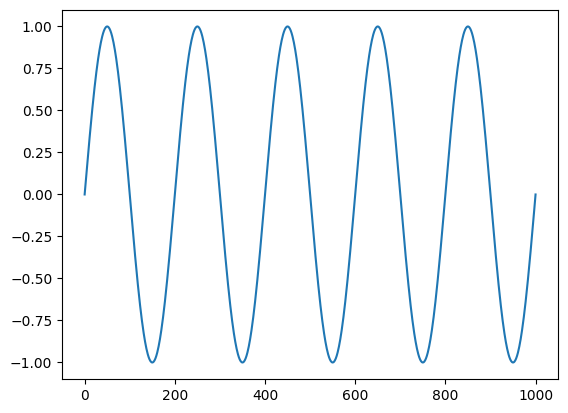

In [ ]:
# Exercise 7 Code
import math as mt
import matplotlib.pyplot as plt
num_range = range(0,1001)
print(list(num_range))

sine_list = [mt.sin((mt.pi/100) * x) for x in num_range]
sine_list

plt.plot(num_range,sine_list)